In here, I'm going to mess around with the graph that had the country, age, and sex in the nodes.

In [1]:
# imports
from GraphDatabaseManager_v2 import GraphManager
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from DatabaseManager import DatabaseManager

In [2]:
# Exercise the necessary parts of the Database manager
database = DatabaseManager('datasets/suicide_rates_by_category.csv')
database.showUniqueNodesOfType('generation')
database.cleanDatabase()
database.showUniqueNodesOfType('generation')
database.binCategory('suicides_per_100k', binlist=[0, 25, 75, 100, 125, 150, 300])
database.showUniqueNodesOfType('suicides_per_100k_bins')
database.printDatabaseOverview()
del database

generation
Generation X    6408
Silent          6364
Millenials      5844
Boomers         4990
Generation Z    1470
dtype: int64
generation
Generation X    6408
Silent          6364
Millenials      5844
Boomers         4990
Generation Z    1470
dtype: int64
suicides_per_100k_bins
0-25       21712
25-75       2959
75-100       317
100-125       60
125-150       14
150-300       14
dtype: int64
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
4  Albania  1987    male  25-34 years            9      274300   
6  Albania  1987  female  35-54 years            6      278800   

   suicides_per_100k country-year  HDI_for_year  gdp_for_year  gdp_per_capita  \
0               6.71  Albania1987           NaN    2156624900             796   
1               5.19  Albania1987           N

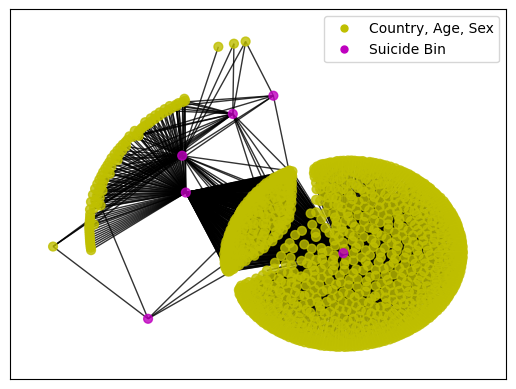

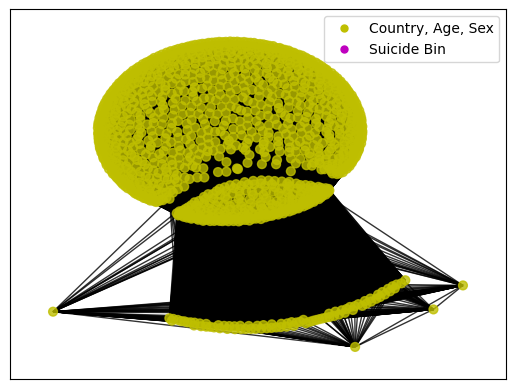

In [24]:
graph_database = GraphManager('datasets/suicide_rates_by_category.csv', node_types=[['country', 'age', 'sex'], ['suicides_per_100k_bins']])
G = graph_database.getGraph_of_Database()
P = graph_database.extractProjectionGraph('country, age, sex')
H = graph_database.extractLargestComponent(G)
pos = nx.nx_agraph.graphviz_layout(H, prog='neato')
color_map = graph_database.getColormap_by_Nodetype(H)

# Plot figure of largest component - same as above I just wanted you to visually see what graph we are working with
plt.figure(1)
nx.draw_networkx(H, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()


pos = nx.nx_agraph.graphviz_layout(P, prog='neato')
color_map = graph_database.getColormap_by_Nodetype(P)
#plt.figure(2)
nx.draw_networkx(P, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

# Show the graph with and without the projection, respectively


We use P here for the graph so we have the largest component with the projection. 

Without the projection is H.

In [26]:
avg_degree = P.number_of_edges() / P.number_of_nodes()
print("avg degree (P): ", avg_degree)

avg_degree = H.number_of_edges() / H.number_of_nodes()
print("avg degree (H): ", avg_degree)

print("assortativity coefficient (P): ", nx.degree_assortativity_coefficient(P))
print("assortativity coefficient (H): ", nx.degree_assortativity_coefficient(H))

# printing this one will give a huge list of the country, ages, and sex of the node along with the average degree of their neighbors
# you have been warned.
#print("average neighbor degree: ", nx.average_neighbor_degree(H))
print("diameter (P): ", nx.diameter(P))
print("radius (P): ", nx.radius(P))
print("diameter (H): ", nx.diameter(H))
print("radius (H): ", nx.radius(H))

avg degree (P):  536.1522462562396
avg degree (H):  1.2466887417218544
assortativity coefficient (P):  0.1408783965691842
assortativity coefficient (H):  -0.7238983179658885
diameter (P):  2
radius (P):  1
diameter (H):  4
radius (H):  3


Running the Girvan-newman algorithm takes over 30 minutes, and so I stopped it. maybe not useful? will try running later tonight.

In [ ]:
# find the clusters using girvan-newman algorithm
communities_generator = nx.community.girvan_newman(P)
print("P partitions: ", tuple(sorted(c) for c in next(communities_generator)))

communities_generator = nx.community.girvan_newman(H)
print("H partitions: ", tuple(sorted(c) for c in next(communities_generator)))

Find nodes with highest degree. Could maybe 'infect' them first and see how they spread?

In [39]:
greatest_to_least_degrees = sorted(P.degree(), key=lambda x: x[1], reverse=True)
print("top 10 nodes: ", greatest_to_least_degrees[0:15])

top 10 nodes:  [('Suriname, 75+ years, male', 1201), ('Guyana, 55-74 years, male', 1201), ('Montenegro, 75+ years, male', 1201), ('Saint Vincent and Grenadines, 75+ years, male', 1201), ('Sri Lanka, 15-24 years, male', 1201), ('Saint Lucia, 75+ years, male', 1201), ('Guyana, 75+ years, male', 1201), ('Guyana, 35-54 years, male', 1201), ('Guyana, 25-34 years, male', 1201), ('Suriname, 35-54 years, male', 1201), ('Republic of Korea, 55-74 years, male', 1201), ('Estonia, 15-24 years, male', 1197), ('Luxembourg, 55-74 years, male', 1197), ('Argentina, 75+ years, male', 1197), ('Norway, 25-34 years, male', 1197)]
